# MBTI Project

By The Introverts 

#  For saving time, find and run step1,2,3 before modeling:

In [1]:
reset -fs

In [2]:
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import re
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import numpy as np
plt.style.use('fivethirtyeight')

# Step1

In [3]:
# save time, run this to load the clean post
processed_post = pd.read_csv('data/mbti_preprocessed_1.csv')
processed_post.drop('Unnamed: 0',axis=1,inplace=True)
processed_post.head()

,type,posts,processed_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,moment sportscenter top ten play pr...
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack post alarming sex boring positi...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear enjoyed conversation day esoteric ...
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approachi...


# Step2

### Posts Vectorized

Create a bag of words representation of each user by using tfidf

In [4]:
# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=0.05, max_df=0.85, analyzer='word', ngram_range=(1, 2))
word_tfidf = vectorizer_tfidf.fit_transform(processed_post['processed_posts'])
word_tfidf_df = pd.DataFrame(data = word_tfidf.toarray(), columns = vectorizer_tfidf.get_feature_names())
# CountVectorizer
vectorizer_ct = CountVectorizer(stop_words='english',analyzer='word',input='content', 
                                 decode_error='ignore', max_df=0.48,min_df=5,
                                 token_pattern=r'\w{1,}', max_features=1625, ngram_range=(1,2)) # to compare two methods, I limit max_features=1625
word_ct = vectorizer_ct.fit_transform(processed_post['processed_posts'])
word_ct_df = pd.DataFrame(data = word_ct.toarray(), columns = vectorizer_ct.get_feature_names())

In [5]:
word_tfidf_df.head()

,ability,able,absolute,absolutely,abstract,accept,according,account,accurate,across,...,year ago,year old,yep,yes,yesterday,yet,young,younger,youtube,yup
0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.067997,0.000000,0.083075,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.00000,0.038307,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.12246,0.044400,0.000000,0.106856,0.0,0.0,0.0,0.0,0.064077,0.0,...,0.000000,0.063801,0.000000,0.060355,0.0,0.0,0.0,0.0,0.0,0.081823
3,0.00000,0.071834,0.066683,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.059121,0.000000,0.055929,0.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
word_ct_df.head()

,ability,able,absolute,absolutely,abstract,accept,according,account,accurate,act,...,year ago,year old,yep,yes yes,yesterday,young,younger,youtube,yup,zone
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Step3

In [7]:
mbti = pd.read_csv("data/mbti_FE.csv")
mbti.head()

,type,posts,EorI,NorS,TorF,JorP,avg_comment_length,comment_length_var,Sentiment,Ellipses,Exclamation,Question,Links,Picture,Emojies,Upper
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0,0,0,0,11.12,135.2900,0.996199,8,3,18,24,6,4,13
1,ENTP,'I'm finding the lack of me in these posts ver...,1,0,1,1,23.40,187.4756,0.999350,18,0,5,9,8,14,82
2,INTP,'Good one _____ https://www.youtube.com/wat...,0,0,1,1,16.72,180.6900,0.999250,13,4,12,4,0,10,26
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0,0,1,0,21.28,181.8324,0.999250,23,3,11,2,0,0,57
4,ENTJ,'You're fired.|||That's another silly misconce...,1,0,1,0,19.34,196.4576,0.995699,20,1,10,6,2,1,35


In [8]:
from helperfunctions.PrettyConfusionMatrix import print_cm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings('ignore')
from random import choice
# import lightgbm as lgb
import gc
from xgboost.sklearn import XGBClassifier

In [9]:
# def model(model, X, target, nsplits=4):
    
#     F1 = []
#     AUC = []
#     typelist = ["Extroversion or Introversion","Intuition or Sensing","Feeling or Thinking","Judging or Perceiving"]
#     type_map = {"EorI": "Extroversion or Introversion", "NorS": "Intuition or Sensing", 
#                    "TorF": "Feeling or Thinking", "JorP": "Judging or Perceiving"}
    
#     kf = StratifiedShuffleSplit(n_splits=nsplits,random_state=420)

#     for col in target.columns:
#         y = target[col]
#         all_fscores = []
#         all_auc = []
        
#         for train, test in kf.split(X,y):
#             X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
#             probs = np.ones((len(y_test), 16))
#             model.fit(X_train, y_train)
#             preds = model.predict(X_test)
#             fscore = f1_score(y_test, preds)
#             all_fscores.append(fscore)
#             auc = roc_auc_score(y_test,preds)
#             all_auc.append(auc)
#             model_name = str(model).split('(')[0]
        
#         F1.append(np.mean(all_fscores))
#         AUC.append(np.mean(all_auc))
                  
#     return pd.DataFrame(data = {'type':typelist, f'F1_{model_name}':F1, f'AUC_{model_name}':AUC})

In [18]:
def model(model, X, target, nsplits=4):
    kf = StratifiedShuffleSplit(n_splits=nsplits, random_state=420)
    
    types = {'EorI':'Extroversion vs. Introversion', 'NorS': 'Intuition vs. Sensing',
                 'TorF': 'Thinking vs. Feeling','JorP': 'Judging vs. Perceiving'}
    t = time.time()
    for col in target.columns:
        print(f"{types[col]}:")
        y = target[col]
        all_auc = []
        all_accuracies = []
        for train, test in kf.split(X,y):
            X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
            model.fit(X_train, y_train)
            preds = model.predict_prob(X_test)
            auc = roc_auc_score(y_test, preds)
            all_auc.append(auc)
            accuracy = accuracy_score(preds, y_test)
            all_accuracies.append(accuracy)
            model_name = str(model).split('(')[0]
        print(f'Average AUC: {np.mean(all_auc):.3f}; Average Accuracy: {np.mean(all_accuracies):.3f}')
        print_cm(confusion_matrix(y_test, preds,[1,0]),['1','0'])
    print(f"Time use:{time.time()-t:.3f}s")    

In [19]:
# initialize
MNB = MultinomialNB()
LR = LogisticRegression(random_state=0, max_iter=10)
SVM = SVC(kernel='linear')
target = mbti.iloc[:,2:6]
# X_tf = np.column_stack((mbti.iloc[:,6:].drop('Sentiment',axis=1),word_tfidf_df))
# X_ct = np.column_stack((mbti.iloc[:,6:].drop('Sentiment',axis=1),word_ct_df))

X_tf = pd.concat([mbti.iloc[:,6:],word_tfidf_df],axis=1)
X_ct = pd.concat([mbti.iloc[:,6:],word_ct_df],axis=1)

In [20]:
model(MNB, X_tf, target, nsplits=5)

Extroversion vs. Introversion:
Average AUC: 0.569; Average Accuracy: 0.667
              1     0 
        1  75.0 125.0 
        0 171.0 497.0 
Intuition vs. Sensing:
Average AUC: 0.533; Average Accuracy: 0.712
              1     0 
        1  37.0  83.0 
        0 151.0 597.0 
Thinking vs. Feeling:
Average AUC: 0.642; Average Accuracy: 0.636
              1     0 
        1 278.0 120.0 
        0 202.0 268.0 
Judging vs. Perceiving:
Average AUC: 0.555; Average Accuracy: 0.572
              1     0 
        1 329.0 195.0 
        0 194.0 150.0 
Time use:3.310s


In [21]:
model(LR, X_tf, target, nsplits=5)

Extroversion vs. Introversion:
Average AUC: 0.509; Average Accuracy: 0.769
              1     0 
        1   5.0 195.0 
        0   3.0 665.0 
Intuition vs. Sensing:
Average AUC: 0.500; Average Accuracy: 0.862
              1     0 
        1   0.0 120.0 
        0   0.0 748.0 
Thinking vs. Feeling:
Average AUC: 0.656; Average Accuracy: 0.662
              1     0 
        1 221.0 177.0 
        0 116.0 354.0 
Judging vs. Perceiving:
Average AUC: 0.502; Average Accuracy: 0.604
              1     0 
        1 518.0   6.0 
        0 339.0   5.0 
Time use:14.681s


In [22]:
model(MNB, X_ct, target, nsplits=5)

Extroversion vs. Introversion:
Average AUC: 0.643; Average Accuracy: 0.704
              1     0 
        1 109.0  91.0 
        0 161.0 507.0 
Intuition vs. Sensing:
Average AUC: 0.649; Average Accuracy: 0.734
              1     0 
        1  60.0  60.0 
        0 163.0 585.0 
Thinking vs. Feeling:
Average AUC: 0.741; Average Accuracy: 0.738
              1     0 
        1 305.0  93.0 
        0 137.0 333.0 
Judging vs. Perceiving:
Average AUC: 0.608; Average Accuracy: 0.623
              1     0 
        1 360.0 164.0 
        0 164.0 180.0 
Time use:3.412s


In [23]:
model(LR, X_ct, target, nsplits=5)

Extroversion vs. Introversion:
Average AUC: 0.539; Average Accuracy: 0.773
              1     0 
        1  11.0 189.0 
        0  13.0 655.0 
Intuition vs. Sensing:
Average AUC: 0.507; Average Accuracy: 0.859
              1     0 
        1   1.0 119.0 
        0   2.0 746.0 
Thinking vs. Feeling:
Average AUC: 0.767; Average Accuracy: 0.768
              1     0 
        1 299.0  99.0 
        0 115.0 355.0 
Judging vs. Perceiving:
Average AUC: 0.632; Average Accuracy: 0.674
              1     0 
        1 429.0  95.0 
        0 193.0 151.0 
Time use:12.852s


Notice the great gap between AUC and accuracy in EorI, IorS, both of which are unbalanced. But we can deal with it in the following models.

# Plotting Multiple ROC curves 

In [210]:
from collections import defaultdict
from sklearn.metrics import roc_curve, auc

In [269]:
def model_probabilities(model, X, target, nsplits=4):
'''
Estimates probabilities for observations being in class 1.

Function returns a dictionary with keys of class 'EorI', 'NorS', 'TorF', and 'JorP'. 
Within each class value contains a list of probabilities for each split.

Example: total_probabilities['EorI'] contains [[p1,p2,p3...],[p1,p2,p3...],...]
'''    
    kf = StratifiedShuffleSplit(n_splits=nsplits, random_state=420)
    total_probabilities = defaultdict() 
    
    for col in target.columns:
        y = target[col]
        total_probabilities[col] = []    
        for train, test in kf.split(X,y):
            X_train, X_test, y_train, y_test = X.loc[train], X.loc[test], y[train], y[test]
            model.fit(X_train, y_train)
            probabilities = model.predict_proba(X_test)
            score = probabilities[:,1]
            total_probabilities[col].append((score, y_test))
        
    return total_probabilities

In [318]:
def average_ROC_curve(probabilities):
'''
Calculates average ROC curves over n_splits of stratified shuffle splits. Not all thresholds
are chosen equally, thus different splits have different array lengths of FPR and TPR. In 
order to average we need the same array length. We will interpolate tpr values between 0 and 1
in 0.1 increments. This gives an average of an *estimated* ROC curve. 

Function returns a dictionary with keys of class 'EorI', 'NorS', 'TorF', and 'JorP'.  
Within each class value contains another dictionary with keys 'base_fpr', 'est_tpr', and 'auc'
'est_tpr' is the average TPR across all splits and 'auc' is the average AUC across all splits.
'''
    avg_auc = defaultdict() 

    for types in probabilities.keys():
        avg_auc[types] = {'base_fpr':np.linspace(0,1,101), 'est_tpr':np.zeros(101), 'auc':[]} 
        total_splits = len(probabilities[types]) 
        for split in probabilities[types]:
            y_scores = split[0]
            y_true = split[1]
            fpr, tpr, thresholds = roc_curve(y_true,y_scores)
            avg_auc[types]['est_tpr'] += np.interp(base_fpr, fpr, tpr) # Add est_tpr 
            avg_auc[types]['auc'].append(auc(fpr, tpr)) # Append AUC 
        avg_auc[types]['est_tpr'] = avg_auc[types]['est_tpr'] / total_splits # Average TPRs 
        avg_auc[types]['auc'] = np.mean(avg_auc[types]['auc']) # Average AUCs 
        
    return avg_auc 

In [320]:
probabilities = model_probabilities(LR, X_tf, target, nsplits=5)

In [319]:
avg_auc

defaultdict(None,
            {'EorI': {'base_fpr': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
                     0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
                     0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
                     0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
                     0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
                     0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
                     0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
                     0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
                     0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
                     0.99, 1.  ]),
              'est_tpr': array([0.005, 0.029, 0.043, 0.076, 0.094, 0.109, 0.133, 0.147, 0.168,
                     0.179, 0.185, 0.201, 0.214, 

In [259]:
fpr, tpr, thresholds = roc_curve(y_true,y_scores)
roc_auc = auc(fpr,tpr)

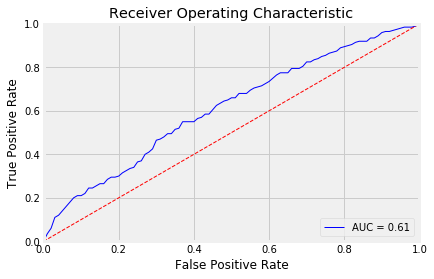

In [306]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(base_fpr, est_tpr, 'b', linewidth=1, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', linewidth = 1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Multinomial Naive Bayes:

In [17]:
mnb_tf_pred = model(MNB, X_tf, target, nsplits=5)
mnb_tf_pred = model(MNB, X_ct, target, nsplits=5)


Extroversion vs. Introversion:
Average AUC: 0.569; Average Accuracy: 0.667
              1     0 
        1  75.0 125.0 
        0 171.0 497.0 
Intuition vs. Sensing:
Average AUC: 0.533; Average Accuracy: 0.712
              1     0 
        1  37.0  83.0 
        0 151.0 597.0 
Thinking vs. Feeling:
Average AUC: 0.642; Average Accuracy: 0.636
              1     0 
        1 278.0 120.0 
        0 202.0 268.0 
Judging vs. Perceiving:
Average AUC: 0.555; Average Accuracy: 0.572
              1     0 
        1 329.0 195.0 
        0 194.0 150.0 
Time use:3.214s
Extroversion vs. Introversion:
Average AUC: 0.643; Average Accuracy: 0.704
              1     0 
        1 109.0  91.0 
        0 161.0 507.0 
Intuition vs. Sensing:
Average AUC: 0.649; Average Accuracy: 0.734
              1     0 
        1  60.0  60.0 
        0 163.0 585.0 
Thinking vs. Feeling:
Average AUC: 0.741; Average Accuracy: 0.738
              1     0 
        1 305.0  93.0 
        0 137.0 333.0 
Judging vs. Perce